In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jokes = pd.read_csv('jester-data-1.csv')
#jokes = jokes.reset_index()
print('Number of Ratings:'+str(len(jokes)))
#jokes = jokes.T
print(jokes.head(10))


Number of Ratings:24983
   Joke1  Joke2  Joke3  Joke4  Joke5  ...  Joke96  Joke97  Joke98  Joke99  Joke100
0  -7.82   8.79  -9.66  -8.16  -7.52  ...   99.00   -5.63   99.00   99.00    99.00
1   4.08  -0.29   6.36   4.37  -2.38  ...   -2.14    3.06    0.34   -4.32     1.07
2  99.00  99.00  99.00  99.00   9.03  ...   99.00   99.00   99.00   99.00    99.00
3  99.00   8.35  99.00  99.00   1.80  ...   99.00   99.00   99.00   99.00    99.00
4   8.50   4.61  -4.17  -5.39   1.36  ...    1.55    3.11    6.55    1.80     1.60
5  -6.17  -3.54   0.44  -8.50  -7.09  ...   -3.35    0.05   -9.08   -5.05    -3.45
6  99.00  99.00  99.00  99.00   8.59  ...    2.33   99.00   99.00   99.00    99.00
7   6.84   3.16   9.17  -6.21  -8.16  ...   -3.35    2.14   -0.05    1.31     0.00
8  -3.79  -3.54  -9.42  -6.89  -8.74  ...   -0.29   -0.29   -0.29   -3.40    -4.95
9   3.01   5.15   5.15   3.01   6.41  ...   99.00   99.00   99.00   99.00    99.00

[10 rows x 100 columns]


In [ ]:
# find the number of values to remove
# handle 99 as removed data
#25 %  removing


from random import randrange
number_to_remove = 625000 

sparse_jokes = np.array(jokes, copy=True)
initial_count_99 = np.sum(np.count_nonzero(jokes == 99, axis=0))
print("Initial count", initial_count_99)

np.random.seed(32) # TODO : remove this
m = np.random.randint(low=0, high=len(jokes), size=(len(jokes),))
p = np.random.randint(low=0, high=jokes.shape[1], size=(jokes.shape[1],))
list_indices=[]

count = 0 
for row_index in m:
  for column_index in p :
    if sparse_jokes[row_index][column_index] != 99:

      sparse_jokes[row_index][column_index] = 99
      count +=1
      list_indices.append((row_index,column_index))
    if count == number_to_remove:
      break
  else:
      continue  # only executed if the inner loop did NOT break
  break



final_count_99 = np.sum(np.count_nonzero(sparse_jokes == 99, axis=0))
print("Final count", final_count_99)

Initial count 687845
Final count 1312845


In [ ]:
def meanmetric(matt):
  meancolumn = list()
  min_max = {}
  i = 0
  for column_index_j in range(matt.shape[1]):
    nt_99 = matt[:,i]
    b = nt_99[nt_99 !=99]
    meancolumn.append(np.mean(b))
    min_max[i] = {'min' : np.min(b), 'max': np.max(b)}
    i += 1
  
  print(meancolumn)
  print(min_max)
meanmetric(sparse_jokes)

[0.8491789952853195, 0.22033127208480563, 0.3676937891189216, -1.5359313893653515, 0.4035564719541979, 1.5422878036040741, -0.4296624759769379, -0.6240851046795565, -0.5673668137088563, 1.3601350819672129, 1.8057967095916778, 1.4558286466435324, -1.7628817901605218, 1.3607639301413808, -1.7062013052007847, -3.1444033361847734, -1.136412148433323, -0.6351034869290204, 0.12232331872126592, -0.9371263630532394, 2.0956257774567635, 0.8990624610397705, 0.1494129392971246, -1.6874198627117578, 0.33924205378973105, 1.2598626899268428, 3.17861495547688, 1.5188299291371403, 3.017177894398629, -0.4364927407242588, 2.198943462037638, 3.132738758029979, -1.4007558046437152, 0.8333090415019762, 3.0063505931388264, 3.3125003004205884, -1.3639867306439188, 1.3004786070522356, 1.067337088388215, 0.9495963215096143, -0.32049981350242446, 1.9418531392570064, -0.9699192565508835, -2.1118909562959756, 1.0945426143464132, 1.5002315343915344, 1.606117435590174, 1.8249552849908415, 2.771297832271507, 3.66508

In [ ]:
# Computing Sum and Count for L1 and L2 Losses
def Compute_Sum_and_Count_for_Loss(Mat):
  '''
  sum_l1 = 0
  sum_l2 = 0
  for (row_index,column_index) in list_indices:
        sum_l1 = sum_l1 + abs(jokes.loc[row_index][column_index] - jokes_mean_imputed[row_index][column_index])
        sum_l2 = sum_l2 + (jokes.loc[row_index][column_index] - jokes_mean_imputed[row_index][column_index])**2
  '''
  temp_jokes = np.array(jokes, copy=True)
  temp_jokes[temp_jokes==99]=np.nan
  print(np.count_nonzero(np.isnan(temp_jokes)))
  sum_l1=np.nansum(abs(temp_jokes-Mat))
  sum_l2=(np.nansum(abs(temp_jokes-Mat)**2))

  return sum_l1,sum_l2

In [ ]:
# Computing and displaying for L1 and L2 Losses
def Compute_and_Print_Loss(sum_l1,sum_l2,count):
  l1_loss = sum_l1/count
  l2_loss = sum_l2/count
  print("total sum_l1:", sum_l1)
  print("total sum_l2:", sum_l2)
  print("total count:", count)
  print("L1:", l1_loss)
  print("L2:",l2_loss)
  return l1_loss,l2_loss

In [ ]:
#### 1. replace with mean BASELINE 1 #####
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

mean_simple_imputer = SimpleImputer(missing_values=99, strategy='mean')
jokes_mean_imputed = mean_simple_imputer.fit_transform(sparse_jokes)

no_of_99_jokes = np.sum(np.count_nonzero(jokes_mean_imputed == 99, axis=0))
#print("Not imputed jokes count", no_of_99_jokes)

In [ ]:
# Computing and printing losses for BASELINE
count=625000
sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(jokes_mean_imputed)
l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)

687845
total sum_l1: 2595258.35752431
total sum_l2: 15787582.811868133
total count: 625000
L1: 4.152413372038896
L2: 25.260132498989012


In [ ]:
#meanmetric(jokes_mean_imputed)

In [ ]:
##### Prepare dense dataset  ######
 
present_99_sparse = np.sum(np.count_nonzero(sparse_jokes == 99, axis=0))
print(present_99_sparse)

sparse_jokes_clean = np.copy(sparse_jokes)
rows_with_99 = np.count_nonzero(sparse_jokes == 99, axis=1)
rows_with_99_index= np.where(rows_with_99 != 0)


dense_matrix = np.delete(sparse_jokes_clean, rows_with_99_index, axis=0 )

present_99_dense = np.sum(np.count_nonzero(dense_matrix == 99, axis=0))
print("Dense matrix 99 count", present_99_dense)


1312845
Dense matrix 99 count 0


In [ ]:
# from google.colab import drive
# drive.mount("mnt")
# %cd "mnt/My Drive/CIS-520Project"
# !pip install import-ipynb
# import import_ipynb


In [ ]:
# ######## Similarity Metric : Difference ###########
def KNN_manhattan(dense_matrix,joke_index_to_predict=1):
    dense_jokes_difference = np.copy(dense_matrix)

    primary_joke = dense_jokes_difference[:,joke_index_to_predict].reshape(dense_jokes_difference.shape[0], -1)
    secondary_jokes = dense_jokes_difference

    difference_matrix = np.abs(secondary_jokes - primary_joke)

    l2norm = np.linalg.norm(difference_matrix, ord=2, axis=0, keepdims=False)

    return np.argsort(l2norm), np.sort(l2norm)

In [ ]:
######## Similarity Metric : Cosine Similarity ###########
from sklearn.metrics.pairwise import cosine_similarity
import scipy
from scipy.spatial import distance

def KNN_cosine(dense_matrix,joke_index_to_predict_cosine=1):

    dense_jokes_cosine = np.copy(dense_matrix)
    #joke_index_to_predict_cosine = 1

    primary_joke_cosine = dense_jokes_cosine[:,joke_index_to_predict_cosine].reshape(dense_jokes_cosine.shape[0], -1)
    secondary_jokes = dense_jokes_cosine
    #print(primary_joke.shape, secondary_jokes.shape)

    similarities = []
    for i in range(secondary_jokes.shape[1]):
      cosine_similarity = 1 - scipy.spatial.distance.cosine(primary_joke_cosine, secondary_jokes[:,i])
      similarities.append(cosine_similarity)

    similarities = np.array(similarities)
    # print(similarities)
    
    cosine_similarity_value = np.sort(similarities)[::-1]
    # print(cosine_similarity_value)

    # print(similarities.shape)
    similarities = np.argsort(similarities)[::-1]
    # print(similarities[1:k+1])
    return similarities, cosine_similarity_value

In [ ]:
def baseline_rating_j(ratings):
        #ratings = ratings.ravel()
        ratings_non_99 = ratings[ratings != 99]
        #return  np.sum(ratings_non_99)/ratings_non_99.shape[0]
        return np.mean(ratings_non_99,axis=0)

In [ ]:
def baseline_rating_i(ratings):
        ratings = ratings.ravel()
        ratings_non_99 = ratings[ratings != 99]
        #return  np.sum(ratings_non_99)/ratings_non_99.shape[0]
        return np.mean(ratings_non_99)

In [ ]:
'''
for user in range(sparse_jokes.shape[0]):
    user_baseline_rating= baseline_rating(sparse_matrix_knn_user_baseline_manhattan[user])
    print("baseline :: ",user, user_baseline_rating)
'''

'\nfor user in range(sparse_jokes.shape[0]):\n    user_baseline_rating= baseline_rating(sparse_matrix_knn_user_baseline_manhattan[user])\n    print("baseline :: ",user, user_baseline_rating)\n'

In [ ]:
##### Soft KNN with User baseline adjusted ######
def compute_soft_knn_user_baseline_manhattan(k=99):
  jokes_sim_manhattan = {}
  jokes_sim_manhattan_value = {}
  for r in range (0,sparse_jokes.shape[1]):
      jokes_sim_manhattan[r] , jokes_sim_manhattan_value[r] = KNN_manhattan(dense_matrix,r)

  sparse_matrix_knn_user_baseline_manhattan = np.copy(sparse_jokes)
  joke_baseline_rating_j = {}
  joke_baseline_rating_i = {}
  
  for r in range (0,100):
      joke_baseline_rating_j[r] = baseline_rating_j(sparse_matrix_knn_user_baseline_manhattan[:,jokes_sim_manhattan[r][:k]])

  for r in range (0,100):
      joke_baseline_rating_i[r] = baseline_rating_i(sparse_matrix_knn_user_baseline_manhattan[:,r])
      

  user_indices=sparse_jokes.shape[0]
  joke_indices=sparse_jokes.shape[1]

  for user in range(user_indices):
    #joke_baseline_rating = baseline_rating(sparse_matrix_knn_user_baseline_manhattan[user])
    # print("baseline :: ", user_baseline_rating)
    for joke in range(joke_indices):
      #joke_baseline_rating_i = baseline_rating_i(sparse_matrix_knn_user_baseline_manhattan[:,joke])
      if sparse_matrix_knn_user_baseline_manhattan[user][joke]==99:
        similar_jokes=jokes_sim_manhattan[joke]
        similar_jokes_manhattan_value = jokes_sim_manhattan_value[joke]
        #print(joke_baseline_rating_j)
        #joke_baseline_rating_j = baseline_rating_j(sparse_matrix_knn_user_baseline_manhattan[:,similar_jokes[:k]])
        #if (user==3 and joke==5):
           #print(joke_baseline_rating_j)
          
        count=0
        sum=0
        joke_num=1

        # Check how many similar jokes the user has rated
        user_data = np.copy(sparse_matrix_knn_user_baseline_manhattan[user])
        user_data_sorted = user_data[similar_jokes]

        ##Finding the similarity values from other users for those jokes which the current user has rated
        similarity_values_user_ratings = similar_jokes_manhattan_value[user_data_sorted != 99]
        similarity_values_user_ratings_k = similarity_values_user_ratings[:k]

        user_non_99 = user_data_sorted[user_data_sorted != 99]
        user_non_99_k = user_non_99[:k]
        if (user_non_99_k.shape[0]):
          # user rated similar jokes found
          sparse_matrix_knn_user_baseline_manhattan[user][joke] = joke_baseline_rating_i[joke] +(np.sum(similarity_values_user_ratings_k*(user_non_99_k-joke_baseline_rating_j[joke]))/np.sum(similarity_values_user_ratings_k))
          #if (user ==3 and joke ==5):
            #print(len(joke_baseline_rating_j))
        else:
          # No user rated similar jokes found
          sparse_matrix_knn_user_baseline_manhattan[user][joke]=jokes_mean_imputed[user][joke]

  return sparse_matrix_knn_user_baseline_manhattan

In [ ]:
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,30,35]
count=625000
#k=[2]
l1_losses_KNN_manhatten_user_baseline=[]
l2_losses_KNN_manhatten_user_baseline=[]

for i in k:
  print("k=",i)
  sparse_matrix_knn_user_baseline_manhattan=compute_soft_knn_user_baseline_manhattan(i)
  sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(sparse_matrix_knn_user_baseline_manhattan)
  l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)
  l1_losses_KNN_manhatten_user_baseline.append(l1_loss)
  l2_losses_KNN_manhatten_user_baseline.append(l2_loss)
  print(l1_loss,l2_loss)
  print("**********")

k= 2
687845
total sum_l1: 2200549.917158495
total sum_l2: 14275572.756471355
total count: 625000
L1: 3.5208798674535924
L2: 22.84091641035417
3.5208798674535924 22.84091641035417
**********
k= 3
687845
total sum_l1: 2115323.7010475686
total sum_l2: 12793331.589642925
total count: 625000
L1: 3.38451792167611
L2: 20.46933054342868
3.38451792167611 20.46933054342868
**********
k= 4
687845
total sum_l1: 2072224.305353929
total sum_l2: 12077089.43071616
total count: 625000
L1: 3.3155588885662866
L2: 19.323343089145858
3.3155588885662866 19.323343089145858
**********
k= 5
687845
total sum_l1: 2052820.0480200008
total sum_l2: 11740108.204017108
total count: 625000
L1: 3.284512076832001
L2: 18.784173126427373
3.284512076832001 18.784173126427373
**********
k= 6
687845
total sum_l1: 2041594.9702557651
total sum_l2: 11498947.3051359
total count: 625000
L1: 3.266551952409224
L2: 18.39831568821744
3.266551952409224 18.39831568821744
**********
k= 7
687845
total sum_l1: 2042564.4969976281
total sum

24


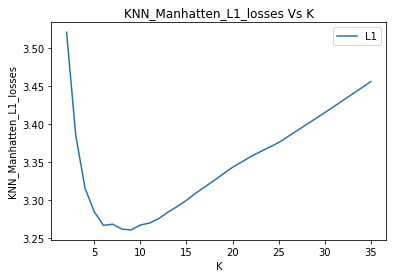

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_Manhatten L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l1_losses_KNN_manhatten_user_baseline, label = "L1")
plt.legend()
plt.title('KNN_Manhatten_L1_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_Manhatten_L1_losses')
plt.show()

24


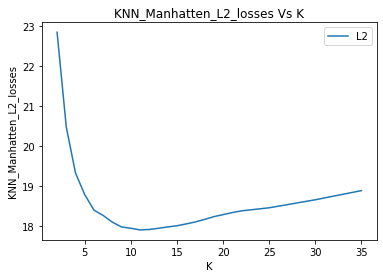

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_Manhatten L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l2_losses_KNN_manhatten_user_baseline, label = "L2")
plt.legend()
plt.title('KNN_Manhatten_L2_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_Manhatten_L2_losses')
plt.show()

In [ ]:
##### Soft KNN with User baseline adjusted ######
def compute_soft_knn_user_baseline_cosine(k=99):
  jokes_sim_cosine = {}
  jokes_sim_cosine_value = {}
  for r in range (0,sparse_jokes.shape[1]):
      jokes_sim_cosine[r] , jokes_sim_cosine_value[r] = KNN_cosine(dense_matrix,r)

  user_indices=sparse_jokes.shape[0]
  joke_indices=sparse_jokes.shape[1]


  sparse_matrix_knn_user_baseline_cosine = np.copy(sparse_jokes)
  joke_baseline_rating_j = {}
  joke_baseline_rating_i = {}

  for r in range (0,100):
      joke_baseline_rating_j[r] = baseline_rating_j(sparse_matrix_knn_user_baseline_cosine[:,jokes_sim_cosine[r][:k]])

  for r in range (0,100):
      joke_baseline_rating_i[r] = baseline_rating_i(sparse_matrix_knn_user_baseline_cosine[:,r])

  for user in range(user_indices):
    # user_baseline_rating_i = baseline_rating(sparse_matrix_knn_user_baseline_cosine[user])
    # print("baseline :: ", user_baseline_rating)
    for joke in range(joke_indices):
      # user_baseline_rating_i = baseline_rating(sparse_matrix_knn_user_baseline_cosine[:])
      if sparse_matrix_knn_user_baseline_cosine[user][joke]==99:
        similar_jokes=jokes_sim_cosine[joke]
        similar_jokes_cosine_value = jokes_sim_cosine_value[joke]

        count=0
        sum=0
        joke_num=1

        # Check how many similar jokes the user has rated
        user_data = np.copy(sparse_matrix_knn_user_baseline_cosine[user])
        user_data_sorted = user_data[similar_jokes]

        ##Finding the similarity values from other users for those jokes which the current user has rated
        similarity_values_user_ratings = similar_jokes_cosine_value[user_data_sorted != 99]
        similarity_values_user_ratings_k = similarity_values_user_ratings[:k]

        user_non_99 = user_data_sorted[user_data_sorted != 99]
        user_non_99_k = user_non_99[:k]
        if (user_non_99_k.shape[0]):
          # user rated similar jokes found
          sparse_matrix_knn_user_baseline_cosine[user][joke] = joke_baseline_rating_i[joke] +(np.sum(similarity_values_user_ratings_k*(user_non_99_k-joke_baseline_rating_j[joke]))/np.sum(similarity_values_user_ratings_k))
        else:
          # No user rated similar jokes found
          sparse_matrix_knn_user_baseline_cosine[user][joke]=jokes_mean_imputed[user][joke]

  return sparse_matrix_knn_user_baseline_cosine


In [ ]:
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,30,35]
count=625000
#k=[2]
l1_losses_KNN_cosine_user_baseline=[]
l2_losses_KNN_cosine_user_baseline=[]

for i in k:
  print("k=",i)
  sparse_matrix_knn_user_baseline_cosine=compute_soft_knn_user_baseline_cosine(i)
  sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(sparse_matrix_knn_user_baseline_cosine)
  l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)
  l1_losses_KNN_cosine_user_baseline.append(l1_loss)
  l2_losses_KNN_cosine_user_baseline.append(l2_loss)
  print(l1_loss,l2_loss)
  print("**********")

k= 2
687845
total sum_l1: 2200346.248197089
total sum_l2: 14246049.914794065
total count: 625000
L1: 3.5205539971153423
L2: 22.793679863670505
3.5205539971153423 22.793679863670505
**********
k= 3
687845
total sum_l1: 2108684.107933937
total sum_l2: 12786835.883761013
total count: 625000
L1: 3.3738945726942995
L2: 20.45893741401762
3.3738945726942995 20.45893741401762
**********
k= 4
687845
total sum_l1: 2071255.44127099
total sum_l2: 12074479.331821484
total count: 625000
L1: 3.314008706033584
L2: 19.319166930914374
3.314008706033584 19.319166930914374
**********
k= 5
687845
total sum_l1: 2053513.9821057783
total sum_l2: 11701909.95184389
total count: 625000
L1: 3.285622371369245
L2: 18.723055922950223
3.285622371369245 18.723055922950223
**********
k= 6
687845
total sum_l1: 2043664.8173986252
total sum_l2: 11489346.16565086
total count: 625000
L1: 3.2698637078378003
L2: 18.382953865041376
3.2698637078378003 18.382953865041376
**********
k= 7
687845
total sum_l1: 2038019.7667341637
to

24


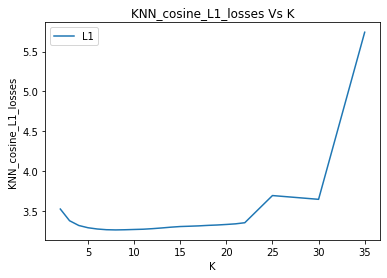

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l1_losses_KNN_cosine_user_baseline, label = "L1")
plt.legend()
plt.title('KNN_cosine_L1_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_cosine_L1_losses')
plt.show()

24


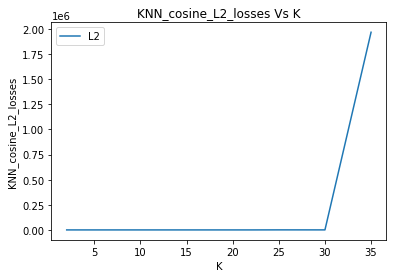

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L2 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l2_losses_KNN_cosine_user_baseline, label = "L2")
plt.legend()
plt.title('KNN_cosine_L2_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_cosine_L2_losses')
plt.show()

In [ ]:
from scipy import stats
def pearson_similarity(dense_matrix,joke_index_to_predict=1):
    dense_jokes_pearson = np.copy(dense_matrix)

  #scipy.stats.pearsonr(dense_matrix,joke_index_to_predict=1):

    primary_joke_pearson = dense_jokes_pearson[:,joke_index_to_predict].reshape(dense_jokes_pearson.shape[0], -1)
    secondary_jokes = dense_jokes_pearson
    #print(primary_joke.shape, secondary_jokes.shape)

    similarities = []
    for i in range(secondary_jokes.shape[1]):
      pearson_similarity, _ = stats.pearsonr(primary_joke_pearson.ravel(), secondary_jokes[:,i].ravel())
      similarities.append(pearson_similarity)

    similarities = np.array(similarities)
    # print(similarities)
    
    pearson_similarity_value = np.sort(similarities)[::-1]
    # print(cosine_similarity_value)

    # print(similarities.shape)
    similarities = np.argsort(similarities)[::-1]
    # print(similarities[1:k+1])
    return similarities, pearson_similarity_value

# print(pearson_similarity(dense_matrix, joke_index_to_predict= 1) )

In [ ]:
##### Soft KNN with User baseline adjusted ######
def compute_soft_knn_user_baseline_pearson(k=99):
  jokes_sim_pearson = {}
  jokes_sim_pearson_value = {}
  for r in range (0,sparse_jokes.shape[1]):
      jokes_sim_pearson[r] , jokes_sim_pearson_value[r] = pearson_similarity(dense_matrix,r)

  user_indices=sparse_jokes.shape[0]
  joke_indices=sparse_jokes.shape[1]


  sparse_matrix_knn_user_baseline_pearson = np.copy(sparse_jokes)
  joke_baseline_rating_j = {}
  joke_baseline_rating_i = {}

  for r in range (0,100):
      joke_baseline_rating_j[r] = baseline_rating_j(sparse_matrix_knn_user_baseline_pearson[:,jokes_sim_pearson[r][:k]])

  for r in range (0,100):
      joke_baseline_rating_i[r] = baseline_rating_i(sparse_matrix_knn_user_baseline_pearson[:,r])

  for user in range(user_indices):
    # user_baseline_rating_i = baseline_rating(sparse_matrix_knn_user_baseline_cosine[user])
    # print("baseline :: ", user_baseline_rating)
    for joke in range(joke_indices):
      # user_baseline_rating_i = baseline_rating(sparse_matrix_knn_user_baseline_cosine[:])
      if sparse_matrix_knn_user_baseline_pearson[user][joke]==99:
        similar_jokes=jokes_sim_pearson[joke]
        similar_jokes_pearson_value = jokes_sim_pearson_value[joke]

        count=0
        sum=0
        joke_num=1

        # Check how many similar jokes the user has rated
        user_data = np.copy(sparse_matrix_knn_user_baseline_pearson[user])
        user_data_sorted = user_data[similar_jokes]

        ##Finding the similarity values from other users for those jokes which the current user has rated
        similarity_values_user_ratings = similar_jokes_pearson_value[user_data_sorted != 99]
        similarity_values_user_ratings_k = similarity_values_user_ratings[:k]

        user_non_99 = user_data_sorted[user_data_sorted != 99]
        user_non_99_k = user_non_99[:k]
        if (user_non_99_k.shape[0]):
          # user rated similar jokes found
          sparse_matrix_knn_user_baseline_pearson[user][joke] = joke_baseline_rating_i[joke] +(np.sum(similarity_values_user_ratings_k*(user_non_99_k-joke_baseline_rating_j[joke]))/np.sum(similarity_values_user_ratings_k))
        else:
          # No user rated similar jokes found
          sparse_matrix_knn_user_baseline_pearson[user][joke]=jokes_mean_imputed[user][joke]

  return sparse_matrix_knn_user_baseline_pearson


In [ ]:
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,30,35,36,38,40,43,45,49,51,53,55,57]
count=625000
# k=[2]
l1_losses_soft_KNN_pearson=[]
l2_losses_soft_KNN_pearson=[]

for i in k:
  print("k=",i)
  sparse_matrix_soft_knn_user_baseline_pearson=compute_soft_knn_user_baseline_pearson(i)
  sum_l1,sum_l2=Compute_Sum_and_Count_for_Loss(sparse_matrix_soft_knn_user_baseline_pearson)
  l1_loss,l2_loss=Compute_and_Print_Loss(sum_l1,sum_l2,count)
  l1_losses_soft_KNN_pearson.append(l1_loss)
  l2_losses_soft_KNN_pearson.append(l2_loss)
  print(l1_loss,l2_loss)
  print("**********")

k= 2
687845
total sum_l1: 2210564.1160087567
total sum_l2: 14339493.978830751
total count: 625000
L1: 3.5369025856140106
L2: 22.9431903661292
3.5369025856140106 22.9431903661292
**********
k= 3
687845
total sum_l1: 2128960.5309945014
total sum_l2: 12865538.977181105
total count: 625000
L1: 3.4063368495912023
L2: 20.58486236348977
3.4063368495912023 20.58486236348977
**********
k= 4
687845
total sum_l1: 2080982.8394595347
total sum_l2: 12114133.800050799
total count: 625000
L1: 3.3295725431352556
L2: 19.38261408008128
3.3295725431352556 19.38261408008128
**********
k= 5
687845
total sum_l1: 2056628.0205692195
total sum_l2: 11759868.246124718
total count: 625000
L1: 3.290604832910751
L2: 18.81578919379955
3.290604832910751 18.81578919379955
**********
k= 6
687845
total sum_l1: 2044409.225775259
total sum_l2: 11529098.83845184
total count: 625000
L1: 3.2710547612404146
L2: 18.446558141522942
3.2710547612404146 18.446558141522942
**********
k= 7
687845
total sum_l1: 2035859.4745287173
tota

34


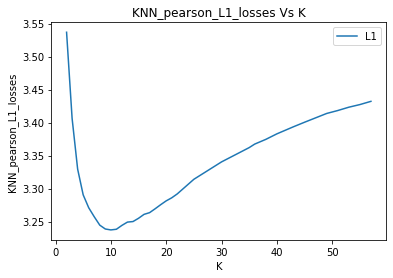

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L1 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l1_losses_soft_KNN_pearson, label = "L1")
plt.legend()
plt.title('KNN_pearson_L1_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_pearson_L1_losses')
plt.show()

34


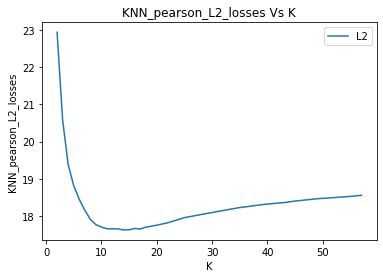

In [ ]:
#Plotting L1 and L2 Losses for different K values for KNN_cosine L2 losses
import matplotlib.pyplot as plt
print(len(k))
plt.plot(k,l2_losses_soft_KNN_pearson, label = "L2")
plt.legend()
plt.title('KNN_pearson_L2_losses Vs K')
plt.xlabel('K')
plt.ylabel('KNN_pearson_L2_losses')
plt.show()